In [594]:
import numpy as np
import pandas as pd
import glob

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

import math
import random
import datetime
import operator

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [595]:
confirmed_cases = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

In [596]:
confirmed_cases.head()
# confirmed_cases.shape
# confirmed_cases['1/23/20'].sum()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27


In [597]:
deaths_reported = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [598]:
deaths_reported.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,36,40,42,43,47,50,57,58,60,64
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,27,27,27,27,28,28,30,30,31
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,392,402,407,415,419,425,432,437,444,450
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,37,37,37,40,40,40,40,41,42,42
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [599]:
recovered_cases = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [600]:
recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,150,166,179,188,188,207,220,228,252,260
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,345,356,385,394,403,410,422,431,455,470
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1152,1204,1355,1408,1479,1508,1558,1651,1702,1779
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,282,309,333,344,344,344,385,398,423,468
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,7,7


In [601]:
latest_data = pd.read_csv('https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_daily_reports/04-28-2020.csv')

In [602]:
latest_data.head()

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-04-29 02:32:29,34.223334,-82.461707,29,0,0,29,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-04-29 02:32:29,30.295065,-92.414197,130,9,0,121,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-04-29 02:32:29,37.767072,-75.632346,223,4,0,219,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-04-29 02:32:29,43.452658,-116.241552,662,16,0,646,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-04-29 02:32:29,41.330756,-94.471059,1,0,0,1,"Adair, Iowa, US"


In [603]:
# Fectching all column names from Confirmed cases dataset
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/21/20', '4/22/20', '4/23/20', '4/24/20', '4/25/20', '4/26/20',
       '4/27/20', '4/28/20', '4/29/20', '4/30/20'],
      dtype='object', length=104)

In [604]:
# Extracting the date columns
# confirmed = confirmed_cases.iloc[:,4:]
confirmed = confirmed_cases.loc[:,cols[4]:cols[-1]]
deaths = deaths_reported.iloc[:,4:]
recoveries = recovered_cases.iloc[:,4:]

In [605]:
confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
0,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
1,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
2,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
3,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
4,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,8,8,14
263,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6
264,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [606]:
dates = confirmed.keys()
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20', '2/1/20', '2/2/20',
       '2/3/20', '2/4/20', '2/5/20', '2/6/20', '2/7/20', '2/8/20', '2/9/20',
       '2/10/20', '2/11/20', '2/12/20', '2/13/20', '2/14/20', '2/15/20',
       '2/16/20', '2/17/20', '2/18/20', '2/19/20', '2/20/20', '2/21/20',
       '2/22/20', '2/23/20', '2/24/20', '2/25/20', '2/26/20', '2/27/20',
       '2/28/20', '2/29/20', '3/1/20', '3/2/20', '3/3/20', '3/4/20', '3/5/20',
       '3/6/20', '3/7/20', '3/8/20', '3/9/20', '3/10/20', '3/11/20', '3/12/20',
       '3/13/20', '3/14/20', '3/15/20', '3/16/20', '3/17/20', '3/18/20',
       '3/19/20', '3/20/20', '3/21/20', '3/22/20', '3/23/20', '3/24/20',
       '3/25/20', '3/26/20', '3/27/20', '3/28/20', '3/29/20', '3/30/20',
       '3/31/20', '4/1/20', '4/2/20', '4/3/20', '4/4/20', '4/5/20', '4/6/20',
       '4/7/20', '4/8/20', '4/9/20', '4/10/20', '4/11/20', '4/12/20',
       '4/13/20', '4/14/20', '4/15

In [607]:
world_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []


china_cases = []
italy_cases = []
usa_cases = []
india_cases = []

china_deaths = []
italy_deaths = []
usa_deaths = []
india_deaths = []

china_recoveries = []
italy_recoveries = []
usa_recoveries = []
india_recoveries = []

china_recoveries = []
italy_recoveries = []
usa_recoveries = []
india_recoveries = []

In [608]:
for i in dates:
    
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum - death_sum - recovered_sum)
    
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)
    
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region'] == 'China'][i].sum())
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region'] == 'China'][i].sum())
    
    china_recoveries.append(recovered_cases[recovered_cases['Country/Region'] == 'China'][i].sum())

In [609]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6166,
 8234,
 9927,
 12038,
 16787,
 19881,
 23892,
 27635,
 30794,
 34391,
 37120,
 40150,
 42762,
 44802,
 45221,
 60368,
 66885,
 69030,
 71224,
 73258,
 75136,
 75639,
 76197,
 76819,
 78572,
 78958,
 79561,
 80406,
 81388,
 82746,
 84112,
 86011,
 88369,
 90306,
 92840,
 95120,
 97886,
 101801,
 105847,
 109821,
 113590,
 118620,
 125875,
 128352,
 145219,
 156116,
 167466,
 181603,
 197113,
 214846,
 242616,
 272247,
 304555,
 337018,
 378282,
 418079,
 467723,
 529701,
 593423,
 660824,
 720285,
 782490,
 857608,
 932638,
 1013458,
 1095876,
 1176059,
 1249737,
 1321427,
 1396438,
 1480200,
 1565538,
 1657929,
 1736025,
 1835164,
 1905192,
 1975581,
 2055506,
 2151872,
 2239723,
 2317339,
 2400894,
 2471847,
 2549175,
 2624741,
 2708547,
 2795875,
 2881140,
 2955033,
 3023722,
 3097190,
 3172287,
 3256853]

In [610]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2007,
 2122,
 2247,
 2251,
 2458,
 2469,
 2629,
 2708,
 2770,
 2814,
 2872,
 2941,
 2996,
 3085,
 3160,
 3254,
 3347,
 3459,
 3558,
 3801,
 3987,
 4263,
 4614,
 4722,
 5408,
 5830,
 6472,
 7150,
 7956,
 8823,
 9946,
 11422,
 13125,
 14825,
 16759,
 19014,
 21785,
 24788,
 28288,
 31797,
 35323,
 39439,
 44238,
 49675,
 55817,
 61812,
 67981,
 73076,
 78767,
 86662,
 93354,
 100882,
 108113,
 114146,
 119853,
 125561,
 132456,
 140677,
 147965,
 156824,
 163234,
 167797,
 173123,
 180268,
 186945,
 193698,
 200030,
 206218,
 209931,
 214515,
 220830,
 227696,
 233388]

In [611]:
confirmed_sum

3256853

In [612]:
death_sum

233388

In [613]:
recovered_sum

1014775

In [614]:
china_cases[-1]

83956

In [615]:
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    
    return d

In [616]:
world_daily_deaths = daily_increase(total_deaths)
world_daily_increase  = daily_increase(world_cases)
china_daily_deaths = daily_increase(china_deaths)

In [617]:
world_daily_increase

[555,
 99,
 287,
 493,
 684,
 809,
 2651,
 588,
 2068,
 1693,
 2111,
 4749,
 3094,
 4011,
 3743,
 3159,
 3597,
 2729,
 3030,
 2612,
 2040,
 419,
 15147,
 6517,
 2145,
 2194,
 2034,
 1878,
 503,
 558,
 622,
 1753,
 386,
 603,
 845,
 982,
 1358,
 1366,
 1899,
 2358,
 1937,
 2534,
 2280,
 2766,
 3915,
 4046,
 3974,
 3769,
 5030,
 7255,
 2477,
 16867,
 10897,
 11350,
 14137,
 15510,
 17733,
 27770,
 29631,
 32308,
 32463,
 41264,
 39797,
 49644,
 61978,
 63722,
 67401,
 59461,
 62205,
 75118,
 75030,
 80820,
 82418,
 80183,
 73678,
 71690,
 75011,
 83762,
 85338,
 92391,
 78096,
 99139,
 70028,
 70389,
 79925,
 96366,
 87851,
 77616,
 83555,
 70953,
 77328,
 75566,
 83806,
 87328,
 85265,
 73893,
 68689,
 73468,
 75097,
 84566]

In [618]:
unique_countries = list(latest_data['Country_Region'].unique())
unique_countries

['US',
 'Canada',
 'United Kingdom',
 'China',
 'Netherlands',
 'Australia',
 'Denmark',
 'France',
 'Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Central African Republic',
 'Chad',
 'Chile',
 'Colombia',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea'

In [619]:
country_confirmed_cases = []
country_death_cases = []
country_active_cases = []
country_recovery_cases = []
country_mortality_rate = []

no_cases=[]
for country in unique_countries:

    cases = latest_data[latest_data['Country_Region'] == country]['Confirmed'].sum()    
    
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(country)

for i in no_cases:
    unique_countries.remove(i)

# Sort countries by number of confirmed cases
unique_countries = [k for k,v in sorted(zip(unique_countries, country_confirmed_cases), key= operator.itemgetter(1), reverse=True)]                                    

for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region'] == unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region'] == unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region'] == unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(latest_data[latest_data['Country_Region'] == unique_countries[i]]['Active'].sum())
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])


In [620]:
country_df = pd.DataFrame({'Country Name': unique_countries, 
                           'Number of Confirmed Cases':country_confirmed_cases,
                           'Number of Deaths':country_death_cases,
                           'Number of Recoveries':country_recovery_cases,
                           'Number of Active Cases':country_active_cases,
                           'Mortality Rate':country_mortality_rate
                          })

country_df.style.background_gradient(cmap='Blues')

,Country Name,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,US,1012582,58355,115936,838291,0.0576299
1,Spain,232128,23822,123903,84403,0.102624
2,Italy,201505,27359,68941,105205,0.135773
3,France,169053,23694,47775,97584,0.140157
4,United Kingdom,162350,21745,813,139792,0.133939
5,Germany,159912,6314,117400,36198,0.0394842
6,Turkey,114653,2992,38809,72852,0.0260961
7,Russia,93558,867,8456,84235,0.00926698
8,Iran,92584,5877,72439,14268,0.0634775
9,China,83940,4637,78422,881,0.0552418


In [621]:
sorted(zip(unique_countries, country_confirmed_cases), key= operator.itemgetter(1), reverse=True)

[('US', 1012582),
 ('Spain', 232128),
 ('Italy', 201505),
 ('France', 169053),
 ('United Kingdom', 162350),
 ('Germany', 159912),
 ('Turkey', 114653),
 ('Russia', 93558),
 ('Iran', 92584),
 ('China', 83940),
 ('Brazil', 73235),
 ('Canada', 51150),
 ('Belgium', 47334),
 ('Netherlands', 38612),
 ('India', 31324),
 ('Peru', 31190),
 ('Switzerland', 29264),
 ('Portugal', 24322),
 ('Ecuador', 24258),
 ('Saudi Arabia', 20077),
 ('Ireland', 19877),
 ('Sweden', 19621),
 ('Mexico', 16752),
 ('Israel', 15728),
 ('Austria', 15357),
 ('Singapore', 14951),
 ('Pakistan', 14612),
 ('Chile', 14365),
 ('Japan', 13736),
 ('Poland', 12218),
 ('Belarus', 12208),
 ('Qatar', 11921),
 ('Romania', 11616),
 ('United Arab Emirates', 11380),
 ('Korea, South', 10761),
 ('Indonesia', 9511),
 ('Ukraine', 9410),
 ('Denmark', 9049),
 ('Philippines', 7958),
 ('Norway', 7660),
 ('Czechia', 7504),
 ('Australia', 6744),
 ('Serbia', 6630),
 ('Bangladesh', 6462),
 ('Dominican Republic', 6416),
 ('Panama', 6021),
 ('Colombi

In [622]:
unique_provinces = list(latest_data['Province_State'].unique())
unique_provinces

['South Carolina',
 'Louisiana',
 'Virginia',
 'Idaho',
 'Iowa',
 'Kentucky',
 'Missouri',
 'Oklahoma',
 'Colorado',
 'Illinois',
 'Indiana',
 'Mississippi',
 'Nebraska',
 'Ohio',
 'Pennsylvania',
 'Washington',
 'Wisconsin',
 'Vermont',
 'Minnesota',
 'Florida',
 'North Carolina',
 'California',
 'New York',
 'Wyoming',
 'Michigan',
 'Maryland',
 'Alaska',
 'Kansas',
 'Tennessee',
 'Texas',
 'Maine',
 'Arizona',
 'Georgia',
 'Arkansas',
 'New Jersey',
 'South Dakota',
 'Alabama',
 'West Virginia',
 'North Dakota',
 'Massachusetts',
 'Utah',
 'Montana',
 'New Hampshire',
 'Oregon',
 'New Mexico',
 'Rhode Island',
 'Nevada',
 'District of Columbia',
 'Connecticut',
 'Hawaii',
 'Delaware',
 'Alberta',
 'Anguilla',
 'Anhui',
 'Aruba',
 'Australian Capital Territory',
 'Beijing',
 'Bermuda',
 'Bonaire, Sint Eustatius and Saba',
 'British Columbia',
 'British Virgin Islands',
 'Cayman Islands',
 'Channel Islands',
 'Chongqing',
 'Curacao',
 'Diamond Princess',
 'Falkland Islands (Malvinas)'

In [623]:
province_confirmed_cases = []
province_death_cases = []
province_active_cases = []
province_recovery_cases = []
province_mortality_rate = []
province_country = []

no_cases=[]
for province in unique_provinces:

    cases = latest_data[latest_data['Province_State'] == province]['Confirmed'].sum()    
    
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(province)

for i in no_cases:
    unique_provinces.remove(i)

# Sort countries by number of confirmed cases
unique_provinces = [k for k,v in sorted(zip(unique_provinces, province_confirmed_cases), key= operator.itemgetter(1), reverse=True)]                                    

for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State'] == unique_provinces[i]]['Confirmed'].sum()
    province_death_cases.append(latest_data[latest_data['Province_State'] == unique_provinces[i]]['Deaths'].sum())
    province_country.append(latest_data[latest_data['Province_State'] == unique_provinces[i]]['Country_Region'].unique()[0])
    province_recovery_cases.append(latest_data[latest_data['Province_State'] == unique_provinces[i]]['Recovered'].sum())
    province_active_cases.append(latest_data[latest_data['Province_State'] == unique_provinces[i]]['Active'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])


In [624]:
province_df = pd.DataFrame({'Province Name': unique_provinces, 
                            'Province Country':province_country,
                            'Number of Confirmed Cases':province_confirmed_cases,
                            'Number of Deaths':province_death_cases,
                            'Number of Recoveries':province_recovery_cases,
                            'Number of Active Cases':province_active_cases,
                            'Mortality Rate':province_mortality_rate
                          })

province_df.style.background_gradient(cmap='Reds')

,Province Name,Province Country,Number of Confirmed Cases,Number of Deaths,Number of Recoveries,Number of Active Cases,Mortality Rate
0,New York,US,295106,22912,0,272194,0.0776399
1,New Jersey,US,113856,6442,0,107414,0.0565802
2,Hubei,China,68128,4512,63616,0,0.0662283
3,Massachusetts,US,58302,3153,0,55149,0.0540805
4,Illinois,US,48102,2125,0,45977,0.044177
5,California,US,46164,1864,0,44300,0.0403778
6,Pennsylvania,US,45137,2046,0,43091,0.0453287
7,Michigan,US,39262,3568,0,35694,0.0908767
8,Florida,US,32848,1171,0,31677,0.0356491
9,Louisiana,US,27286,1801,0,25485,0.0660045


In [625]:
# Dealing with Missing values

nan_indicies = []

# Handle NAN if there is any
for i in range(len(unique_provinces)):
    if type(unique_provinces[i]) == float:
        nan_indicies.append(i)

unique_provinces = list(unique_provinces)
province_confirmed_cases = list(province_confirmed_cases)

for i in nan_indicies:
    unique_provinces.pop(i)
    province_confirmed_cases.pop(i)


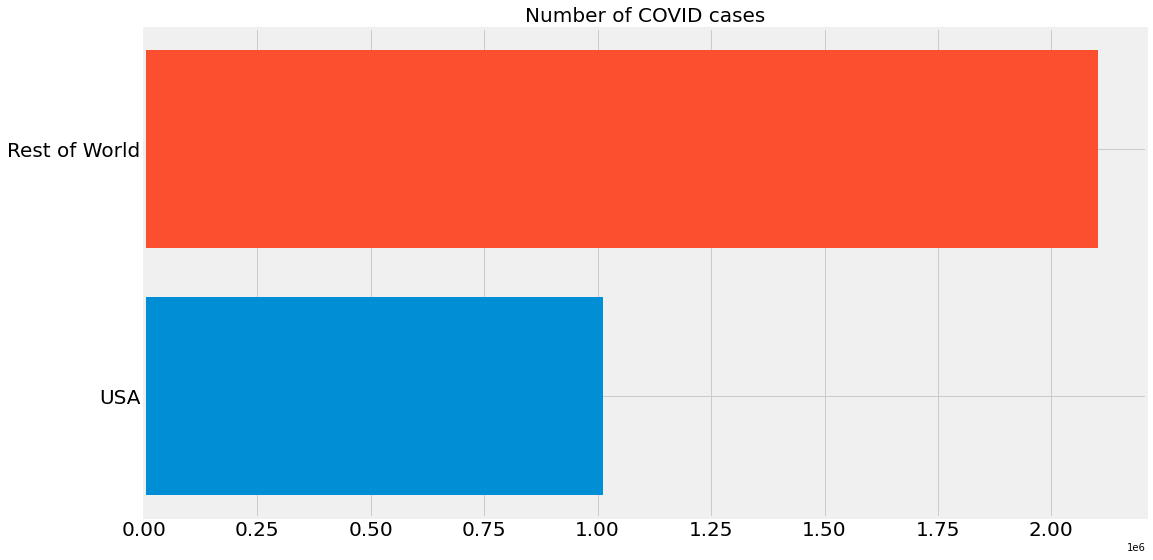

In [626]:
usa_confirmed = latest_data[latest_data['Country_Region'] == 'US']['Confirmed'].sum()
rest_of_world = np.sum(country_confirmed_cases) - usa_confirmed

plt.figure(figsize=(16,9))
plt.barh('USA', usa_confirmed)
plt.barh('Rest of World', rest_of_world)
plt.title('Number of COVID cases',size =20)
plt.xticks(size =20)
plt.yticks(size =20)
plt.show()

In [627]:
print('{} Cases Outside USA'.format(rest_of_world))
print('{} Cases in USA'.format(usa_confirmed))
print('Total Cases in the world are : {}'.format(rest_of_world+usa_confirmed))

2103816 Cases Outside USA
1012582 Cases in USA
Total Cases in the world are : 3116398


In [628]:
# Show 10 countries with most confirmed cases, the rest are grouped into others category
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

# country_confirmed_cases.sort(reverse=True)

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])

visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)
unique_countries

['US',
 'Spain',
 'Italy',
 'France',
 'United Kingdom',
 'Germany',
 'Turkey',
 'Russia',
 'Iran',
 'China',
 'Brazil',
 'Canada',
 'Belgium',
 'Netherlands',
 'India',
 'Peru',
 'Switzerland',
 'Portugal',
 'Ecuador',
 'Saudi Arabia',
 'Ireland',
 'Sweden',
 'Mexico',
 'Israel',
 'Austria',
 'Singapore',
 'Pakistan',
 'Chile',
 'Japan',
 'Poland',
 'Belarus',
 'Qatar',
 'Romania',
 'United Arab Emirates',
 'Korea, South',
 'Indonesia',
 'Ukraine',
 'Denmark',
 'Philippines',
 'Norway',
 'Czechia',
 'Australia',
 'Serbia',
 'Bangladesh',
 'Dominican Republic',
 'Panama',
 'Colombia',
 'Malaysia',
 'Egypt',
 'South Africa',
 'Finland',
 'Morocco',
 'Argentina',
 'Luxembourg',
 'Algeria',
 'Moldova',
 'Kuwait',
 'Kazakhstan',
 'Thailand',
 'Bahrain',
 'Hungary',
 'Greece',
 'Oman',
 'Croatia',
 'Uzbekistan',
 'Iraq',
 'Armenia',
 'Afghanistan',
 'Iceland',
 'Azerbaijan',
 'Cameroon',
 'Ghana',
 'Estonia',
 'Bosnia and Herzegovina',
 'Nigeria',
 'New Zealand',
 'Cuba',
 'North Macedonia'

In [629]:
def plot_bar_graph(x,y, title):
    plt.figure(figsize=(16,9))
    plt.barh(x,y)
    plt.title(title)
    # plt.xticks(size =20)
    # plt.yticks(size =20)
    plt.show()

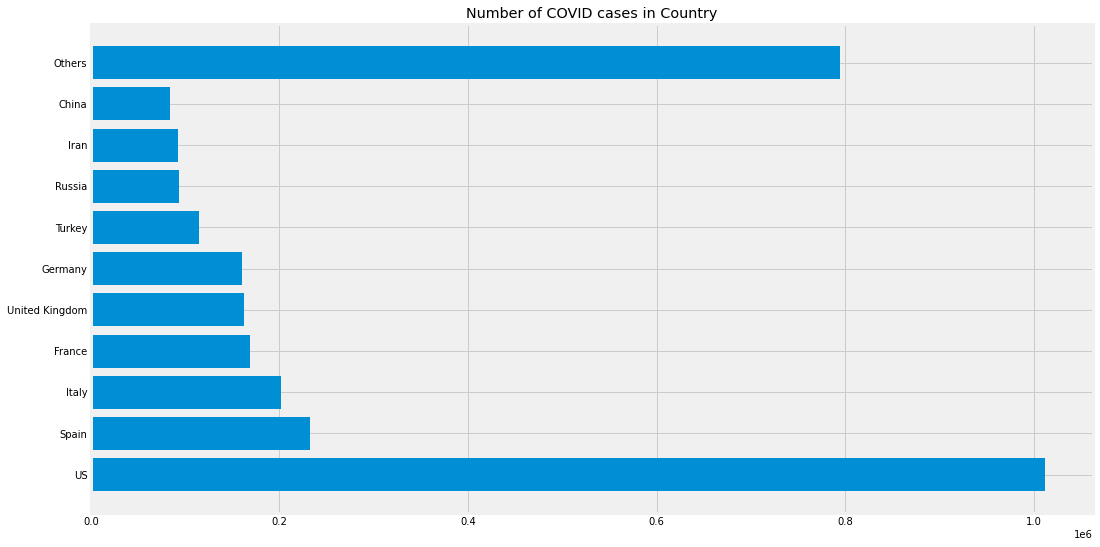

In [630]:
plot_bar_graph(visual_unique_countries, visual_confirmed_cases, 'Number of COVID cases in Country')

In [631]:
# Pie chart

In [632]:
def plot_pie_charts(x, y, title):
    # c = random.choices(list(mcolors.CSS4_COLORS.values()),k = len(unique_countries))
    plt.figure(figsize = (15,15))
    plt.title(title, size = 15)
    plt.pie(y)
    plt.legend(x, loc='best',fontsize=15)
    plt.show()

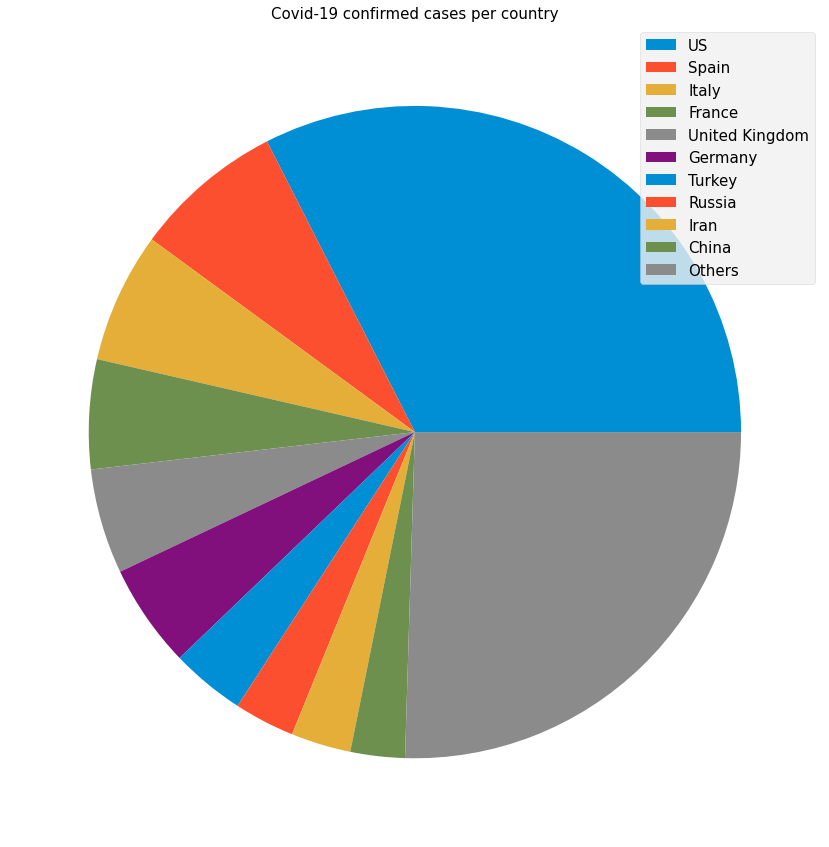

In [633]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases,'Covid-19 confirmed cases per country')

In [634]:
# Building model using Polynomial regression
day_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recovered = np.array(total_recovered).reshape(-1,1)

In [635]:
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1,1)
adjust_dates = future_forecast[:-20]

In [636]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [637]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
future_forecast_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

In [638]:
X_train,X_test,y_train,y_test = train_test_split(day_since_1_22,world_cases,test_size=0.25,shuffle=False)

In [639]:
poly = PolynomialFeatures(degree=3)
ploy_X_train_confirm = poly.fit_transform(X_train)
ploy_X_test_confirm = poly.fit_transform(X_test)
poly_future_forecast = poly.fit_transform(future_forecast)

In [640]:
# Polynomial Regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(ploy_X_train_confirm, y_train)
test_linear_pred = linear_model.predict(ploy_X_test_confirm)
linear_pred = linear_model.predict(poly_future_forecast)
print('MASE:',mean_absolute_error(test_linear_pred, y_test))
print('MSE:',mean_squared_error(test_linear_pred, y_test))

MASE: 366296.30800693063
MSE: 270050219406.88547


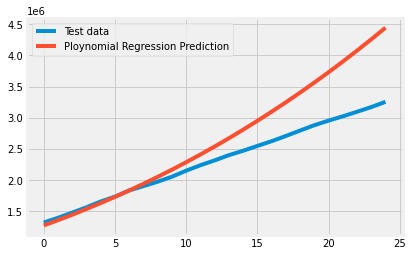

In [641]:
plt.plot(y_test)
plt.plot(test_linear_pred)
plt.legend(['Test data','Ploynomial Regression Prediction'])
#plt.show()

In [642]:
# Support Vector Machine Algorithm
# svm_confirmed = svm_search.best_estimator
svm_confirmed = SVR(shrinking=True, kernel='poly', gamma=0.1, epsilon=1, degree=5, C=0.1)
svm_confirmed.fit(X_train, y_train)
svm_pred = svm_confirmed.predict(future_forecast)

/Users/aishwarya/anaconda/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE 349892.19728579937
MSE 235541571760.13928


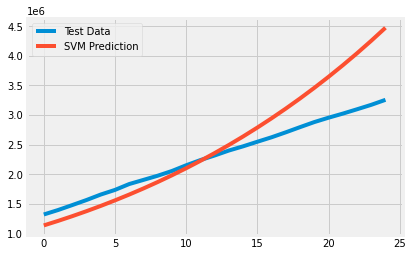

In [643]:
svm_test_pred = svm_confirmed.predict(X_test)
plt.plot(y_test)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Prediction'])
print('MAE', mean_absolute_error(svm_test_pred, y_test))
print('MSE', mean_squared_error(svm_test_pred, y_test))

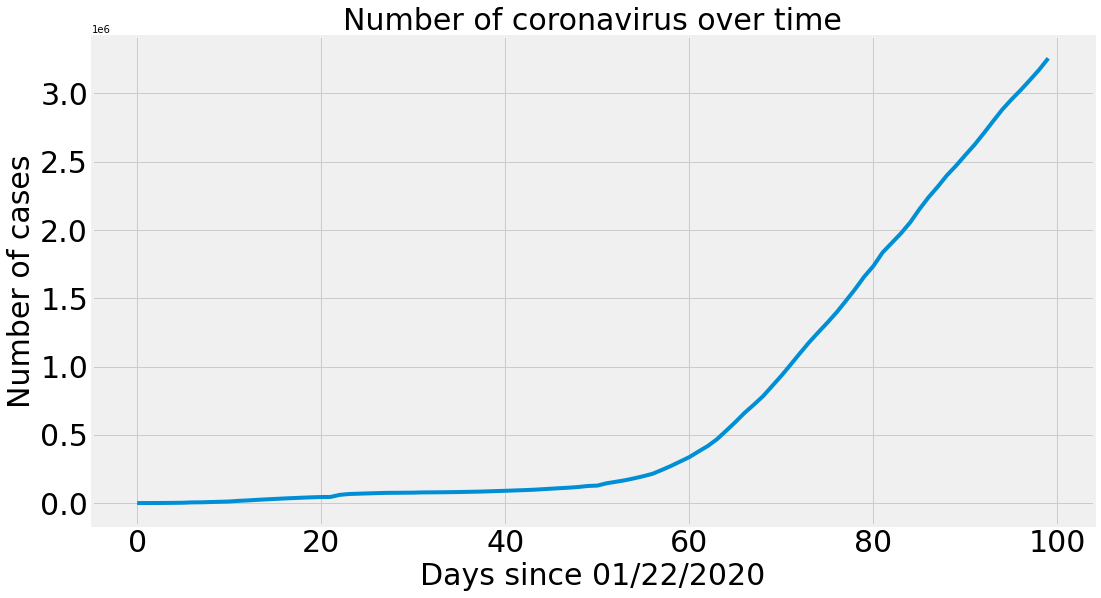

In [644]:
adjust_dates = adjust_dates.reshape(1, -1)[0]
plt.figure(figsize=(16,9))
plt.plot(adjust_dates, world_cases)
plt.title('Number of coronavirus over time', size=30)
plt.xlabel('Days since 01/22/2020', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.show()

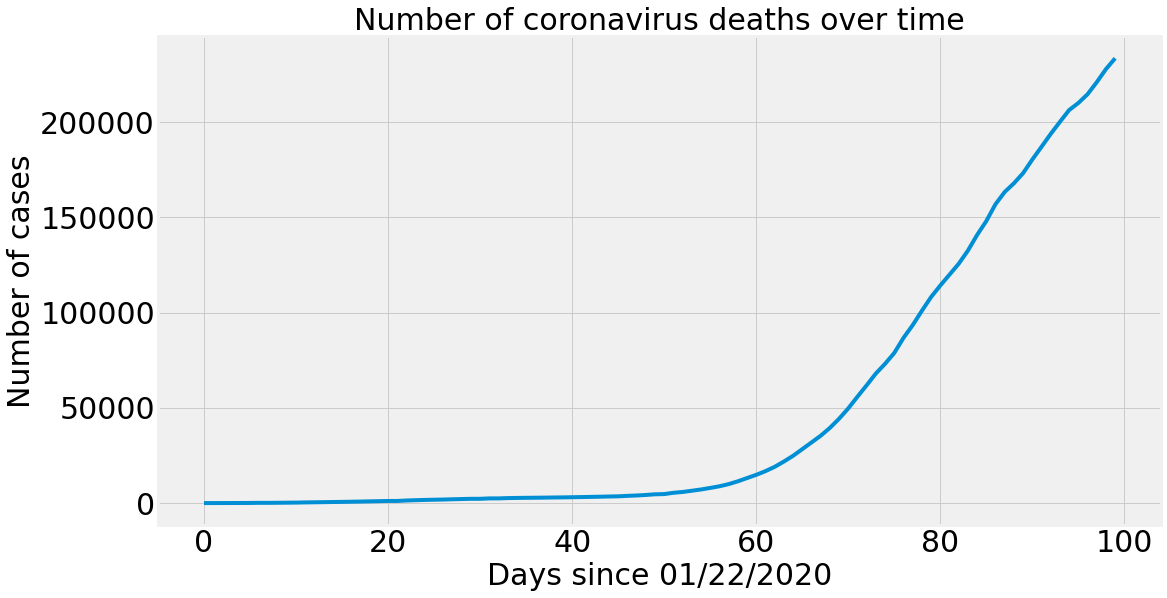

In [645]:
plt.figure(figsize=(16,9))
plt.plot(adjust_dates, total_deaths)
plt.title('Number of coronavirus deaths over time', size=30)
plt.xlabel('Days since 01/22/2020', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.show()

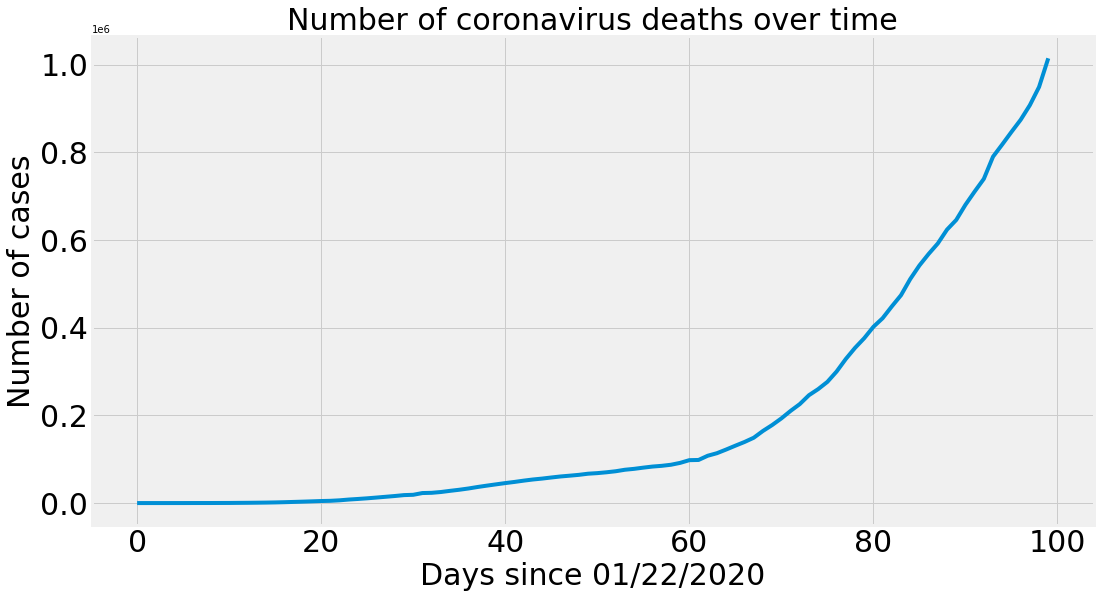

In [646]:
plt.figure(figsize=(16,9))
plt.plot(adjust_dates, total_recovered)
plt.title('Number of coronavirus deaths over time', size=30)
plt.xlabel('Days since 01/22/2020', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.show()

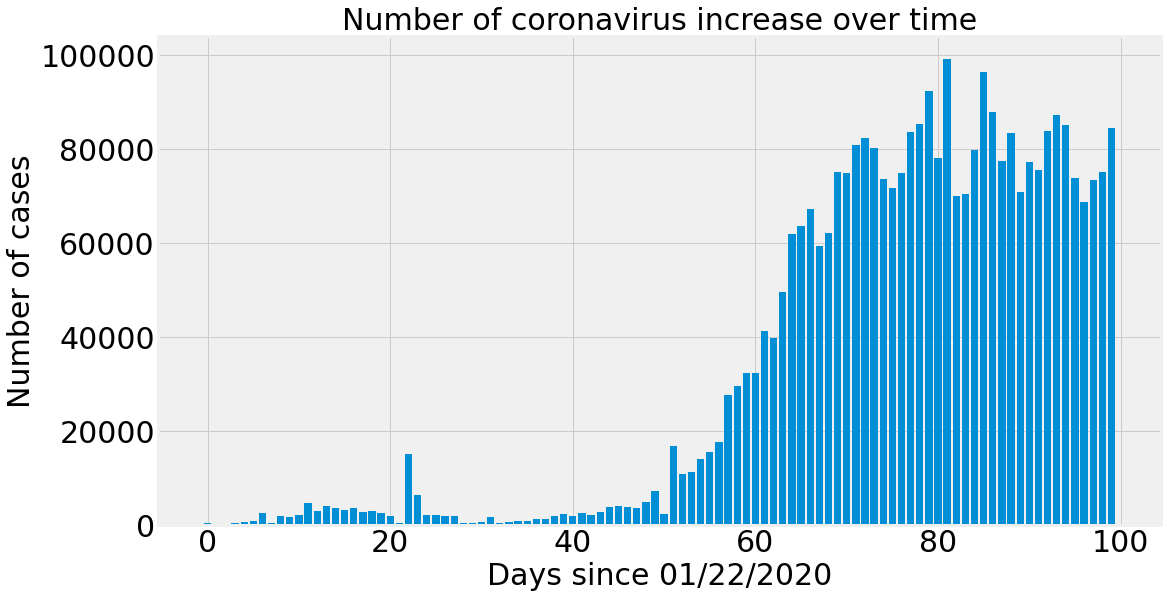

In [647]:
plt.figure(figsize=(16,9))
plt.bar(adjust_dates, world_daily_increase)
plt.title('Number of coronavirus increase over time', size=30)
plt.xlabel('Days since 01/22/2020', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.show()

In [648]:
def plot_predictions(x,y, pred, alog_name, color):
    plt.figure(figsize=(16,9))
    plt.plot(x, y)
    plt.plot(future_forecast, pred, linestyle='dashed', color = color)
    plt.title('Number of coronavirus cases over time', size=30)
    plt.xlabel('Days since 01/22/2020', size = 30)
    plt.ylabel('Number of cases', size = 30)
    plt.legend(['Confirmed Cases',alog_name], prop={'size':20})
    plt.xticks(size = 30)
    plt.yticks(size = 30)
    plt.show()

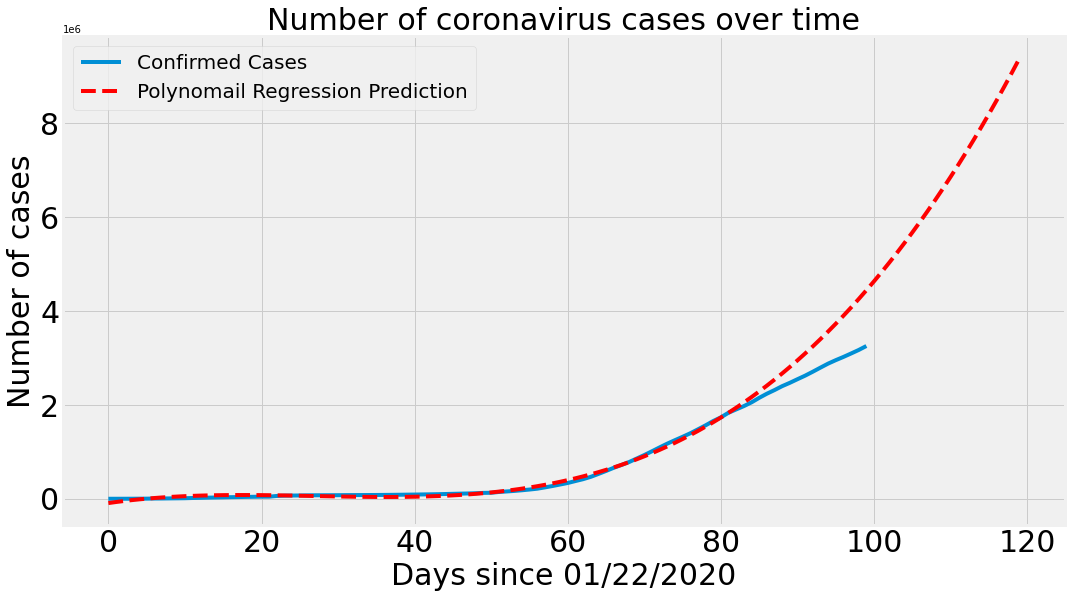

In [649]:
plot_predictions(adjust_dates,world_cases, linear_pred,'Polynomail Regression Prediction', color='red' )

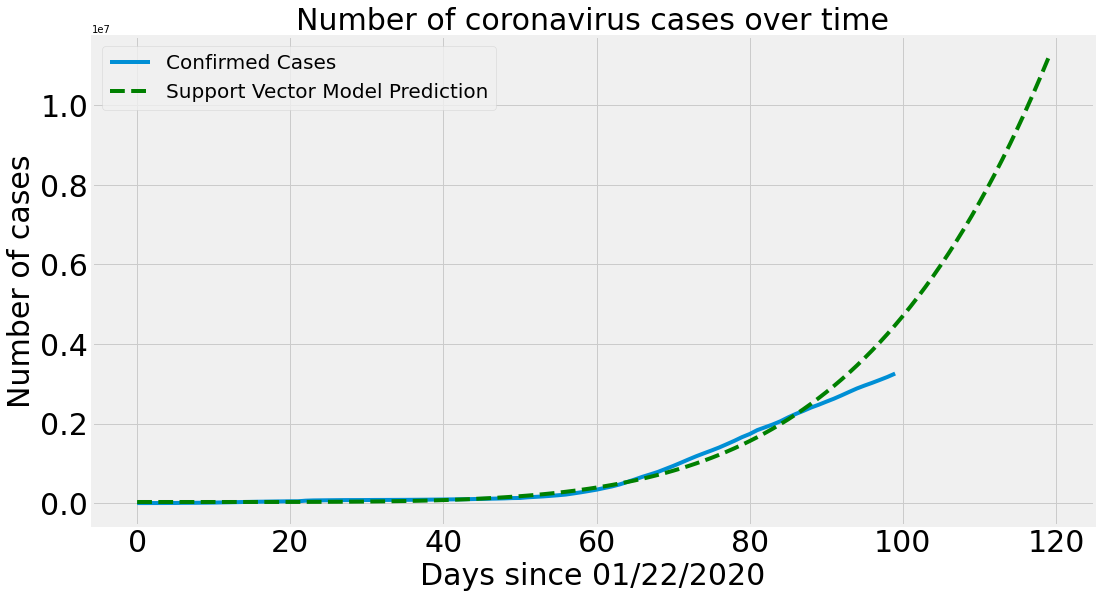

In [650]:
plot_predictions(adjust_dates,world_cases, svm_pred,'Support Vector Model Prediction', color='green' )

In [651]:
future_forecast_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

In [652]:
# Future Prediction 
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date':future_forecast_dates[-20:],
                        'Predicted number of confirmed cases worldwide': np.round(linear_pred[-20:])
                       })
poly_df

,Date,Predicted number of confirmed cases worldwide
0,05/01/2020,4636638.0
1,05/02/2020,4833711.0
2,05/03/2020,5036264.0
3,05/04/2020,5244370.0
4,05/05/2020,5458104.0
5,05/06/2020,5677539.0
6,05/07/2020,5902748.0
7,05/08/2020,6133807.0
8,05/09/2020,6370789.0
9,05/10/2020,6613767.0


In [653]:
# Future Prediction 
svm_df = pd.DataFrame({'Date':future_forecast_dates[-20:],
                        'SVM Predicted number of confirmed cases worldwide': np.round(svm_pred[-20:])
                       })
svm_df

,Date,SVM Predicted number of confirmed cases worldwide
0,05/01/2020,4702758.0
1,05/02/2020,4941250.0
2,05/03/2020,5189377.0
3,05/04/2020,5447428.0
4,05/05/2020,5715696.0
5,05/06/2020,5994484.0
6,05/07/2020,6284097.0
7,05/08/2020,6584847.0
8,05/09/2020,6897053.0
9,05/10/2020,7221039.0


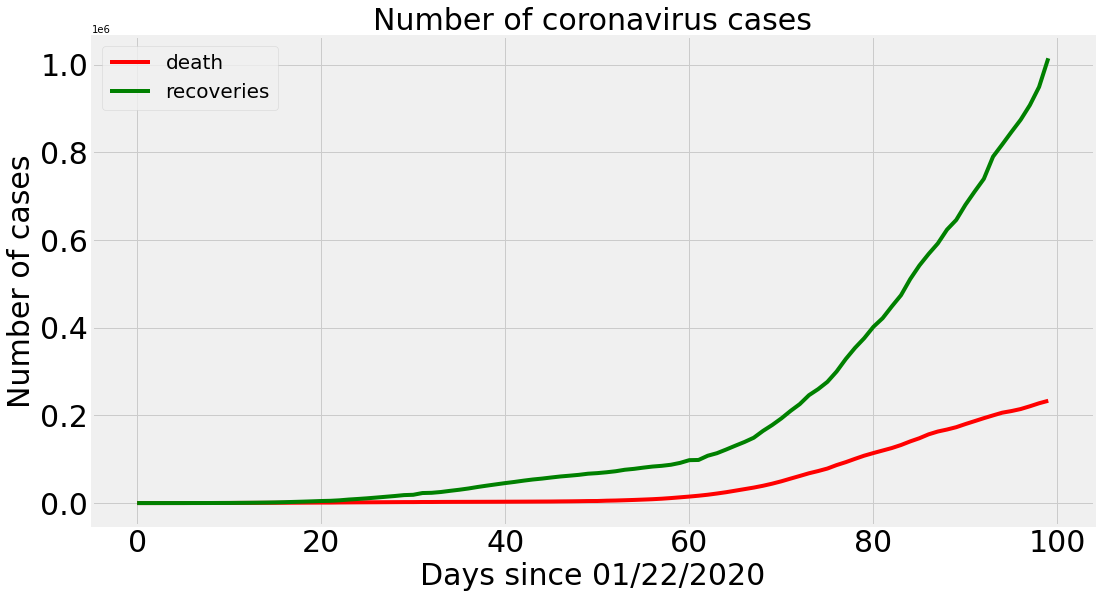

In [654]:
plt.figure(figsize=(16,9))
plt.plot(adjust_dates, total_deaths, color = 'r')
plt.plot(adjust_dates, total_recovered, color = 'green')
plt.legend(['death', 'recoveries'], loc = 'best', fontsize=20)
plt.title('Number of coronavirus cases', size=30)
plt.xlabel('Days since 01/22/2020', size = 30)
plt.ylabel('Number of cases', size = 30)
plt.xticks(size = 30)
plt.yticks(size = 30)
plt.show()